In [2]:
#read dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/fashion-mnist_test.csv')
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
#dimensions
df.shape

(10000, 785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, pixel1 to label
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
#statistical values of all features
df.describe

<bound method NDFrame.describe of       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0       0       0   
9998       0       1       3       0       0       0       0       0       0   
9999       0       0       0       0       0       0       0     140     119   

     

In [ ]:
#each class label count
df.label.value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

In [ ]:
#null values sum
df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
label       0
Length: 785, dtype: int64

In [9]:
#check whether null values are present or not
df.isnull()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label,cluster_id
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df[df.notnull()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label,cluster_id
0,0,0,0,0,0,0,0,9,8,0,...,56,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,63,53,31,0,0,0,2,1
3,0,0,0,0,0,0,0,0,0,161,...,140,0,133,224,222,56,0,0,2,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,14,20,0,0,1,0,0,0,0,5
9996,0,0,0,0,0,0,0,0,0,0,...,0,2,52,23,28,0,0,0,6,5
9997,0,0,0,0,0,0,0,0,0,0,...,172,182,199,222,42,0,1,0,8,5
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,8,5


In [13]:
#outlier detection
q1 = df['pixel15'].quantile(0.25)
q3 = df['pixel15'].quantile(0.75)

iqr = q3 - q1

print(q1, q3, iqr)
print("Lower limit:", q1 - 1.5*iqr)
print("Upper limit:", q3 + 1.5*iqr)

print('Outliers:', end=" ")

for element in list(df['pixel15']):
    if element < q1 - 1.5*iqr or element > q3 + 1.5*iqr:
        print(element, end = " ")

0.0 103.0 103.0
Lower limit: -154.5
Upper limit: 257.5
Outliers: 

In [14]:
q1 = df['pixel760'].quantile(0.25)
q3 = df['pixel760'].quantile(0.75)

iqr = q3 - q1

print(q1, q3, iqr)
print("Lower limit:", q1 - 1.5*iqr)
print("Upper limit:", q3 + 1.5*iqr)

print('Outliers:', end=" ")

for element in list(df['pixel760']):
    if element < q1 - 1.5*iqr or element > q3 + 1.5*iqr:
        print(element, end = " ")

0.0 0.0 0.0
Lower limit: 0.0
Upper limit: 0.0
Outliers: 168 62 85 99 2 108 6 71 22 96 46 17 6 33 40 123 11 19 53 7 62 2 2 1 55 1 160 83 1 98 63 6 34 106 94 98 1 4 91 1 63 6 2 70 3 66 2 184 8 2 2 145 114 74 43 27 237 55 29 107 27 18 48 12 60 6 79 81 31 6 25 39 3 93 2 127 4 11 119 29 49 1 32 119 1 3 48 49 126 123 100 51 27 63 17 23 21 1 54 213 57 32 136 79 29 31 4 108 1 31 143 54 16 12 7 71 56 81 17 131 136 123 28 37 89 5 48 12 119 1 75 222 52 19 93 31 68 20 210 91 112 127 24 21 9 45 15 66 57 3 12 94 18 167 74 74 17 48 35 105 89 196 143 33 220 3 111 47 10 33 50 94 11 5 85 18 26 43 87 53 55 132 81 50 10 21 81 129 175 35 103 1 36 78 2 42 58 71 28 66 18 13 69 18 80 7 85 1 24 25 72 79 15 17 80 154 103 1 66 95 49 66 2 65 3 38 62 65 62 1 23 131 43 15 30 11 52 85 13 24 43 1 129 4 42 54 34 16 20 6 181 90 47 125 38 81 36 35 1 100 1 54 78 20 35 28 103 59 3 20 84 114 47 93 5 48 1 24 14 22 63 83 5 14 89 55 48 1 24 108 20 45 58 35 3 74 26 7 105 6 45 10 37 59 142 103 56 51 97 20 38 210 51 127 55 19 3 

In [17]:
#minmax normalization
df_max_scaled = df.copy()
# apply normalization techniques on Column 777
column = 'pixel777'

df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
# view normalized data
display(df_max_scaled['pixel777'])

0       0.219608
1       0.000000
2       0.000000
3       0.549020
4       0.000000
          ...   
9995    0.054902
9996    0.000000
9997    0.674510
9998    0.000000
9999    0.294118
Name: pixel777, Length: 10000, dtype: float64

In [18]:
#Z-SCORE NORMALIZATION
df_z_scaled = df.iloc[: , :-1]
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()    
# view normalized data   
display(df_z_scaled)

<ipython-input-18-7734c22d9364>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,-0.016331,-0.019612,-0.020887,-0.034859,-0.044676,-0.06172,-0.096220,0.444320,0.108832,-0.378867,...,1.303332,0.938527,-0.404857,-0.442110,-0.394216,-0.290397,-0.154812,-0.084355,-0.033919,-1.566621
1,-0.016331,-0.019612,-0.020887,-0.034859,-0.044676,-0.06172,-0.096220,-0.154422,-0.233649,-0.378867,...,-0.470378,-0.389756,-0.404857,-0.442110,-0.394216,-0.290397,-0.154812,-0.084355,-0.033919,-1.218483
2,-0.016331,-0.019612,-0.020887,-0.034859,-0.044676,-0.06172,1.533253,3.371505,4.004543,0.069543,...,-0.470378,-0.389756,-0.404857,0.776303,0.780219,0.787273,-0.154812,-0.084355,-0.033919,-0.870345
3,-0.016331,-0.019612,-0.020887,-0.034859,-0.044676,-0.06172,-0.096220,-0.154422,-0.233649,3.867843,...,2.098443,2.930953,-0.404857,2.130096,4.569432,7.427109,3.256211,-0.084355,-0.033919,-0.870345
4,-0.016331,-0.019612,-0.020887,-0.034859,-0.044676,-0.06172,-0.096220,-0.154422,-0.233649,-0.378867,...,-0.470378,-0.389756,-0.404857,-0.442110,-0.394216,-0.290397,-0.154812,-0.084355,-0.033919,-0.522207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.016331,-0.019612,-0.020887,-0.034859,-0.044676,-0.06172,-0.096220,-0.154422,-0.233649,0.597085,...,-0.001466,-0.057685,0.048241,-0.442110,-0.394216,-0.255634,-0.154812,-0.084355,-0.033919,-1.566621
9996,-0.016331,-0.019612,-0.020887,-0.034859,-0.044676,-0.06172,-0.096220,-0.154422,-0.233649,-0.378867,...,-0.470378,-0.389756,-0.359547,0.563564,0.115445,0.682982,-0.154812,-0.084355,-0.033919,0.522207
9997,-0.016331,-0.019612,-0.020887,-0.034859,-0.044676,-0.06172,-0.096220,-0.154422,-0.233649,-0.378867,...,3.036266,3.689972,3.718336,3.406528,4.525113,1.169671,-0.154812,0.049648,-0.033919,1.218483
9998,-0.016331,1.884471,1.181847,-0.034859,-0.044676,-0.06172,-0.096220,-0.154422,-0.233649,-0.378867,...,-0.470378,-0.389756,-0.404857,-0.442110,-0.372056,-0.290397,-0.154812,-0.084355,-0.033919,1.218483


In [ ]:
#categorical values and continuous values finding
catg_val = []
cont_val = []
for column in df.columns:
    if len(df[column].unique())<= 10:
        catg_val.append(column)
    else:
        cont_val.append(column)
print("Categorical columns: ", catg_val)
print("Continuous columns: ", cont_val)

Categorical columns:  ['pixel1', 'pixel2', 'pixel28', 'pixel29', 'label']
Continuous columns:  ['pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87'

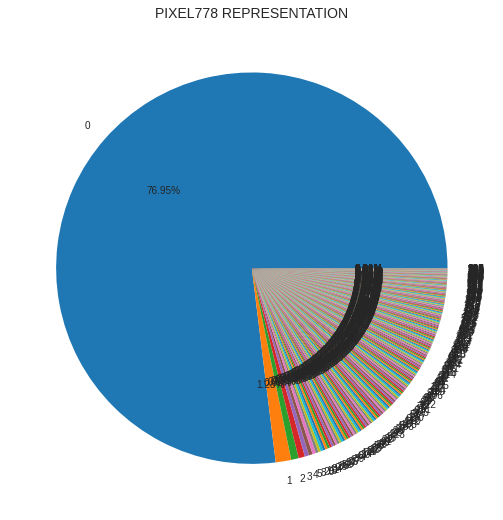

In [ ]:
#percentage of pixel778 impact on label
plt.figure(figsize=(10,9))
df1 = df['pixel778'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('PIXEL778 REPRESENTATION', fontsize=14)
plt.show()  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import hvplot.pandas
df.label.value_counts().hvplot.bar(
    title="PIXEL777 REPRESENTATION", xlabel='pixel777', ylabel='pixel778',width=500, height=350 ,color='orange'
)

:Bars   [index]   (label)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf27894b80>,
      dtype=object)

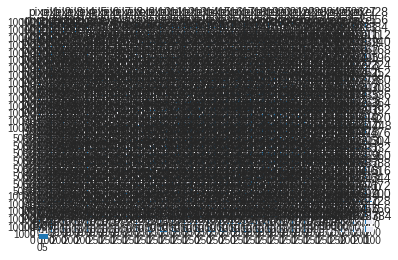

In [ ]:
#Graphs showing the frequency distribution of all the attributes
df.hist()

In [ ]:
have_dis = df.loc[df['label']==1, 'pixel778'].value_counts().hvplot.bar(alpha=0.5) 
no_dis = df.loc[df['label']==0, 'pixel778'].value_counts().hvplot.bar(alpha=0.5) 
(no_dis * have_dis).opts(
    title="PIXEL777 REPRESENTATION", xlabel='pixel777', ylabel='pixel778',width=500, height=450)

:Overlay
   .Bars.Pixel778.I  :Bars   [index]   (pixel778)
   .Bars.Pixel778.II :Bars   [index]   (pixel778)

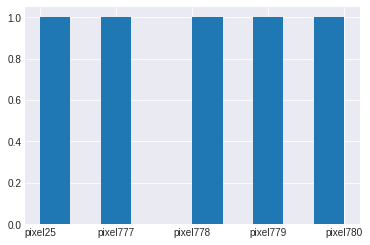

In [ ]:
import matplotlib.pyplot as plt
x = ["pixel25", "pixel777", "pixel778","pixel779","pixel780"]
plt.hist(x)
plt.show()

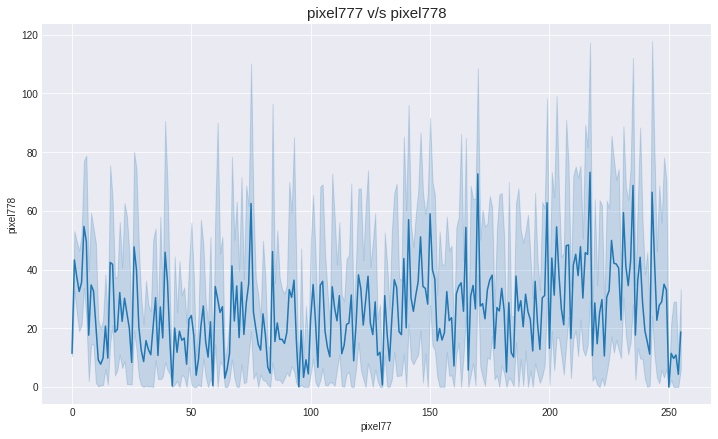

In [ ]:
#pixel777 vs pixel778
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,7)) 
plt.style.use('seaborn-darkgrid')
sns.lineplot(df['pixel77'], df['pixel778'])
plt.title('pixel777 v/s pixel778', fontsize = 15)
plt.show()

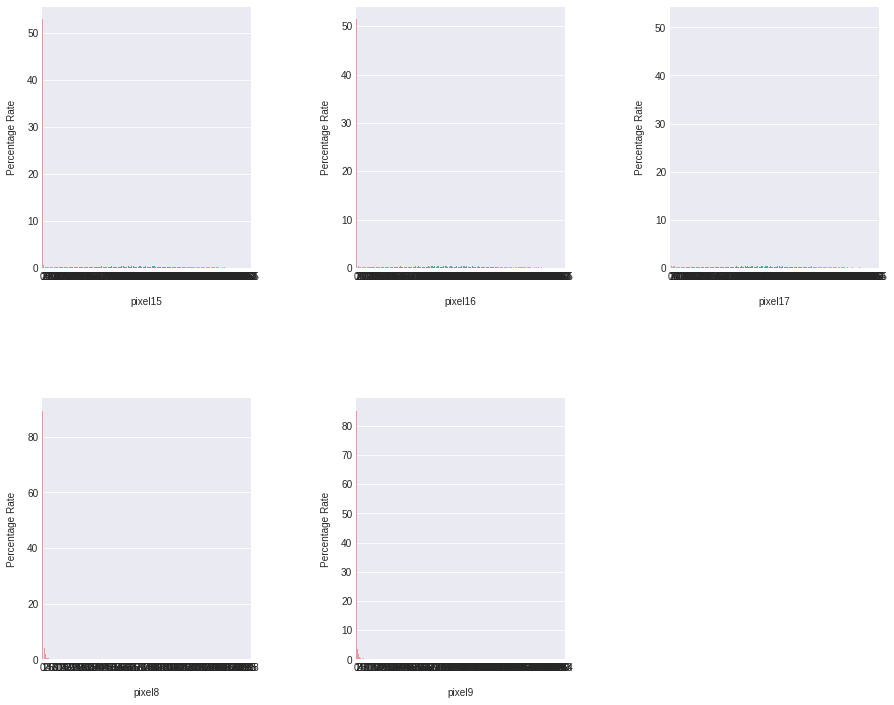

In [ ]:
#percentage rate of categorical values
category_list = ['pixel15', 'pixel16', 'pixel17', 'pixel8', 'pixel9']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
    series = round(((df[col_list].value_counts(dropna = False))/(len(df[col_list])) * 100), 2)
    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)
    counter += 1

del category_list, counter, ax
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)

plt.show()

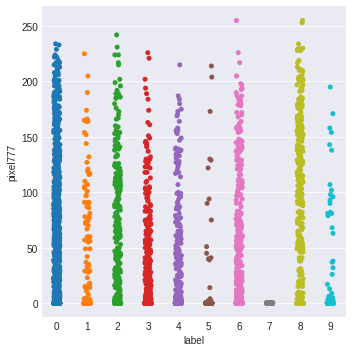

In [ ]:
#plot of fashion prediction based on pixel777 attribute alone
sns.catplot(x='label',y='pixel777',data = df)

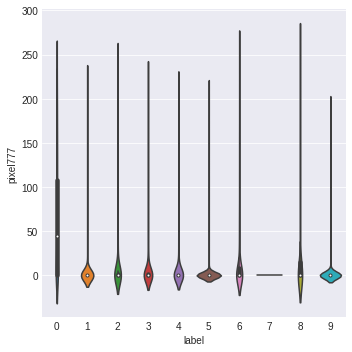

In [ ]:
#violin plot for proportionality
sns.catplot(x='label',y='pixel777',kind ='violin',data = df)

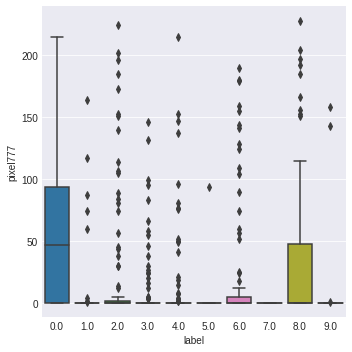

In [ ]:
#box plot based on pixel777(found more outliers - not regular data)
sns.catplot(x='label',y='pixel777',kind = 'box',data = df)

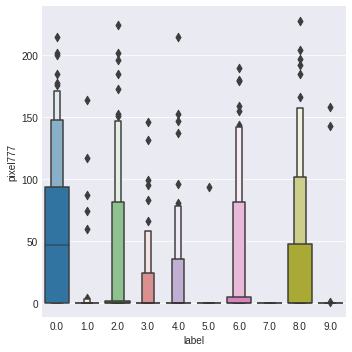

In [ ]:
sns.catplot(x='label',y='pixel777',kind = 'boxen',data = df)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

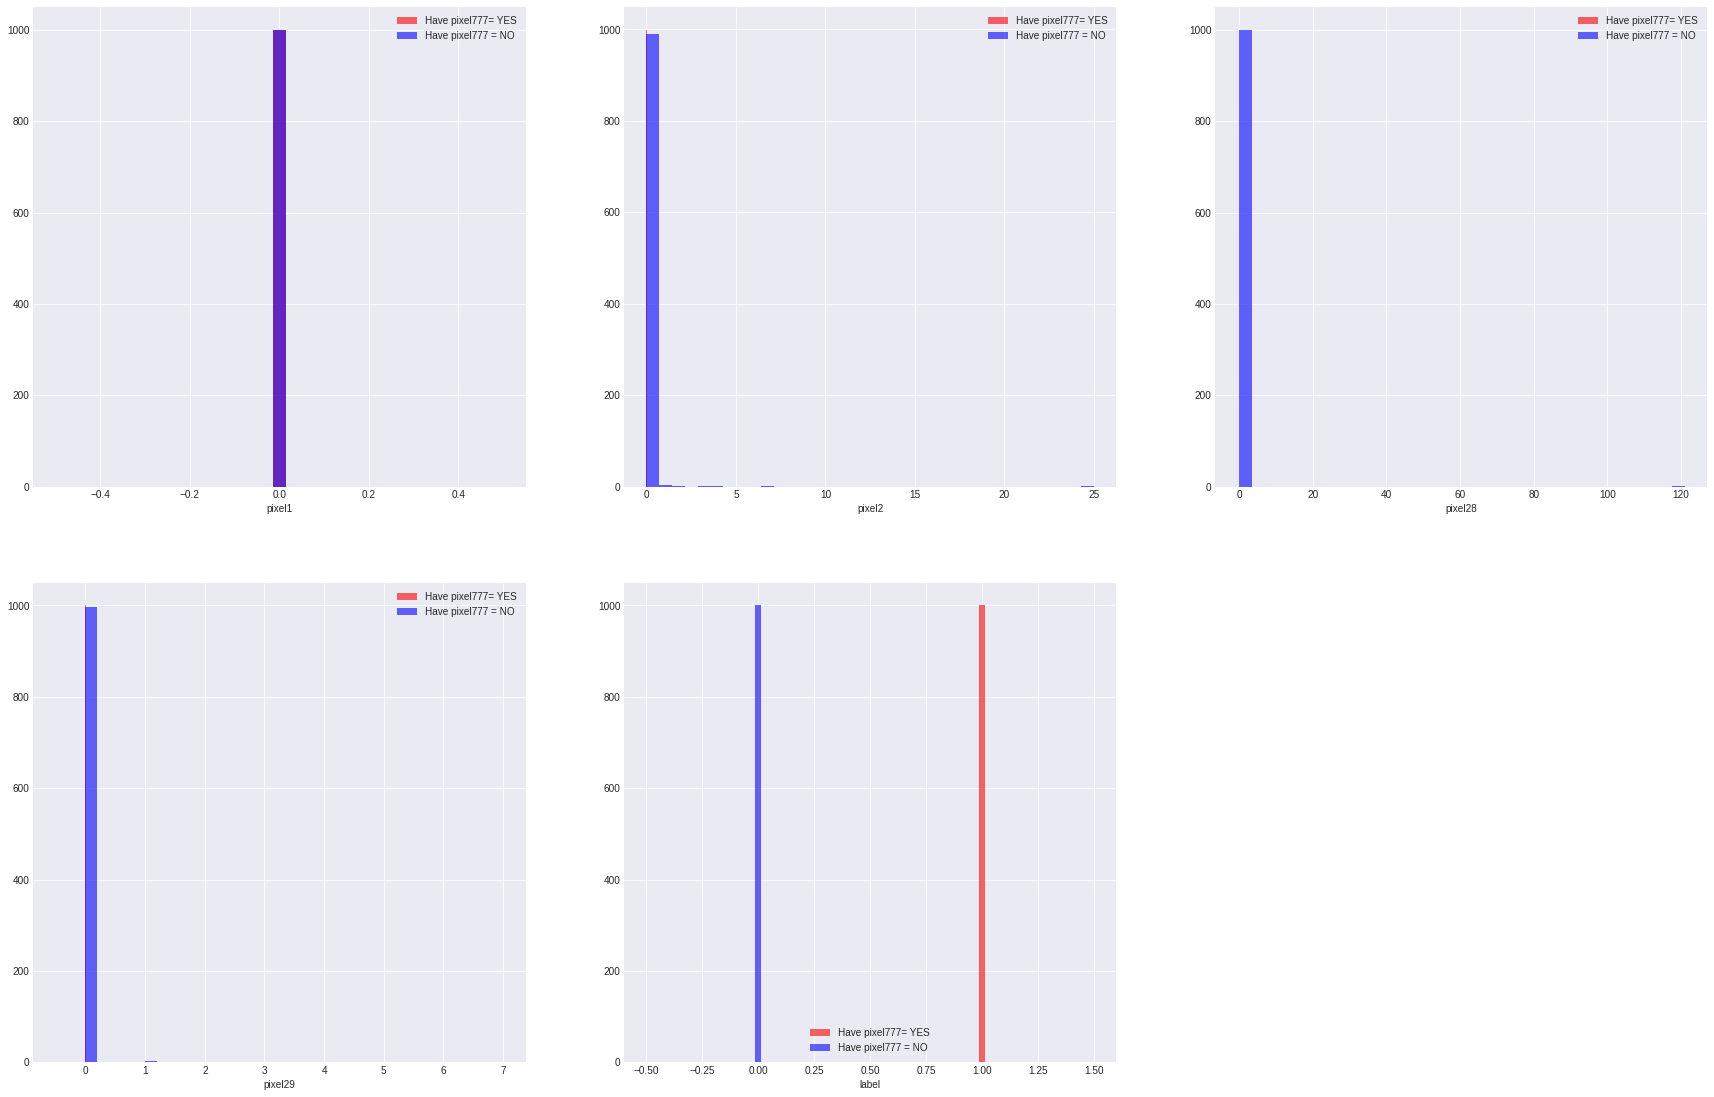

In [ ]:
#label based on pixel777
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(30, 30))
for i, column in enumerate(catg_val, 1):
    plt.subplot(3, 3, i)
    df[df["label"] == 1][column].hist(bins=35, color='red', label='Have pixel777= YES', alpha=0.6)
    df[df["label"] == 0][column].hist(bins=35, color='blue', label='Have pixel777 = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

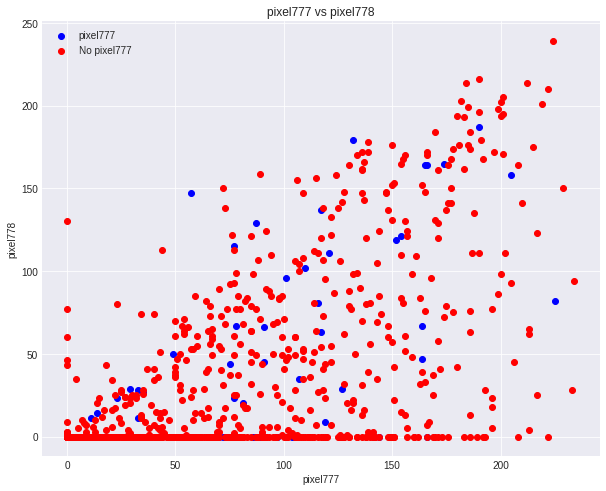

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(df.pixel777[df.label==1], df.pixel778[df.label==1], c="blue")
plt.scatter(df.pixel777[df.label==0], df.pixel778[df.label==0], c="red")

plt.title("pixel777 vs pixel778")
plt.xlabel("pixel777"); plt.ylabel("pixel778")
plt.legend(["pixel777", "No pixel777"]);

In [ ]:
df.drop('label', axis=1).corrwith(df.label).hvplot.barh(
    width=600, height=400, 
    title="Correlation between pixel77 and pixel778", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

In [ ]:
catg_val.remove("pixel2")
ds = pd.get_dummies(df, columns = catg_val)
ds.head()

,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,0,0,0,0,0,9,8,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,14,53,99,17,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,161,212,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,37,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
catg_val

['pixel1', 'pixel2', 'pixel28', 'pixel29', 'label']

In [ ]:
ss=StandardScaler()
colscale=['pixel777','pixel778','pixel779','pixel780','pixel781']
ds[colscale] = ss.fit_transform(ds[colscale])
ds.head()

,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,0,0,0,0,0,9,8,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,14,53,99,17,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,161,212,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,37,...,0,0,0,1,0,0,0,0,0,0


In [3]:
# Set random seed
np.random.seed(42)

# Define total number of products
number_of_products = 10
# Store the real mean in a separate variable
real_mean = round(df['label'].mean(),3)
print(real_mean)
df

4.5


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,8
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


In [4]:
# sample (n,axis)
simple_random_sample = df.sample(n=4).sort_values(by='pixel777')

# Save the sample mean in a separate variable
simple_random_mean = round(simple_random_sample['label'].mean(),3)
print(simple_random_mean)
# View sampled data frame
simple_random_sample

4.75


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
6252,0,0,0,0,0,0,0,0,2,0,...,0,0,98,70,58,0,0,0,0,4
4684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1731,0,0,0,0,0,0,0,0,0,76,...,0,26,30,0,0,3,0,0,0,6
4742,0,0,0,1,1,0,0,0,0,54,...,188,193,28,0,5,1,0,0,0,0


In [6]:
#systematic sampling

def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df, 3)

# Save the sample mean in a separate variable
systematic_mean = round(systematic_sample['label'].mean(),5)

# View sampled data frame
systematic_sample

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9,0,0,0,0,0,0,0,0,0,0,...,70,28,0,2,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,73,0,164,225,123,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,0,0,0,0,0,0,0,0,0,0,...,44,0,0,38,38,44,0,0,0,6
9990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6


In [7]:
#cluster sampling
def cluster_sampling(df, number_of_clusters):
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters)
        print(df)
        # Create an empty list
        indexes = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%2 == 0:
                indexes.append(i)
        print(indexes)
        cluster_sample = df.iloc[indexes]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")
    
# Obtain a cluster sample and save it in a new variable
cluster_sample = cluster_sampling(df,5)

# Save the sample mean in a separate variable
cluster_mean = round(cluster_sample['label'].mean(),3)

# View sampled data frame
cluster_sample

      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0       0       0   
9998       0       1       3       0       0       0       0       0       0   
9999       0       0       0       0       0       0       0     140     119   

      pixel10  ...  pixel777  pixel778 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label,cluster_id
2000,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,8,2
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,2
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2
2003,0,0,0,0,0,0,2,0,0,0,...,0,49,104,114,0,0,0,0,4,2
2004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,4
7996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,4
7997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
7998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4


In [8]:
# Create a dictionary with the mean outcomes for each sampling method and the real mean
outcomes = {'sample_mean':[simple_random_mean,systematic_mean,cluster_mean],
           'real_mean':real_mean}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Cluster Sampling'])

# Add a value corresponding to the absolute error
outcomes['abs_error'] = abs(outcomes['real_mean'] - outcomes['sample_mean'])

# Sort data frame by absolute error
outcomes.sort_values(by='abs_error')

,sample_mean,real_mean,abs_error
Systematic Sampling,4.5117,4.5,0.0117
Cluster Sampling,4.4710,4.5,0.0290
Simple Random Sampling,4.7500,4.5,0.2500


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


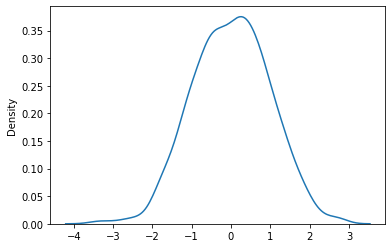

In [19]:
#normal distribution
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(random.normal(size=1000), hist=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


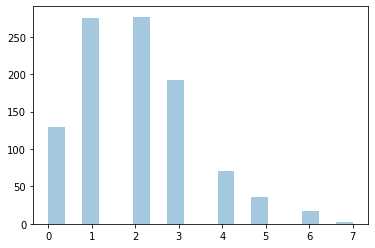

In [20]:
#poisson distribution
sns.distplot(random.poisson(lam=2, size=1000), kde=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


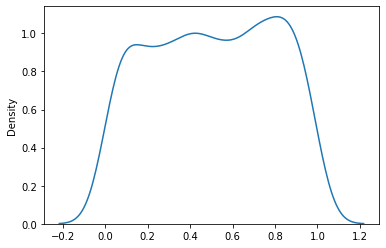

In [21]:
#uniform distribution
sns.distplot(random.uniform(size=1000), hist=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


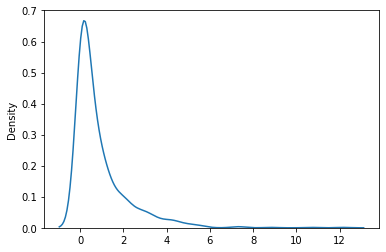

In [22]:
#chi square distribution
sns.distplot(random.chisquare(df=1, size=1000), hist=False)
plt.show()